In [48]:
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np

Disable all error logs from Tensorflow 

In [49]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' ## disable all debugging logs using os.environ
'''0 = all messages are logged (default behavior)
   1 = INFO messages are not printed
   2 = INFO and WARNING messages are not printed
   3 = INFO, WARNING, and ERROR messages are not printed '''

'0 = all messages are logged (default behavior)\n   1 = INFO messages are not printed\n   2 = INFO and WARNING messages are not printed\n   3 = INFO, WARNING, and ERROR messages are not printed '

In [50]:
print("Welcome to the Handwritten Recognition v1.0 Zone........")

Welcome to the Handwritten Recognition v1.0 Zone........


In [51]:
# Decide on whether to load an existing model or train a new one:
TRAIN_NEW_MODEL = True

In [52]:
if TRAIN_NEW_MODEL:
    # Load the MNIST sample and split it:
    mnist = tf.keras.datasets.mnist
    data = mnist.load_data()
    (X_train, y_train), (X_test, y_test) = data

    # Normalizaing the data: (making the length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    """
    Creating a Neural Network - 
    1 flattened input layer for the pixels
    2 dense hidden layers 
    1 output dense layer for the 10 digits
    """
    model = tf.keras.models.Sequential() # A Sequential model is appropriate for a plain stack of layers where each layer 
                                         # has exactly one input tensor and one output tensor.
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) ## Activarion func. = Relu
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model:
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=5)

    # # Evaluating the model:
    # val_loss, val_acc = model.evaluate(X_test, y_test)
    # print(val_loss)
    # print(val_acc)

    # Saving the model:
    model.save('handwritten_digits.model')                                       

else:
    # Load the model:
    model = tf.keras.models.load_model('handwritten_digits.model')


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2597 - accuracy: 0.9245 - val_loss: 0.1333 - val_accuracy: 0.9608
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9678 - val_loss: 0.1109 - val_accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0707 - accuracy: 0.9778 - val_loss: 0.0987 - val_accuracy: 0.9691
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0909 - val_accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0890 - val_accuracy: 0.9749
INFO:tensorflow:Assets written to: handwritten_digits.model\assets


In [53]:
history = hist.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

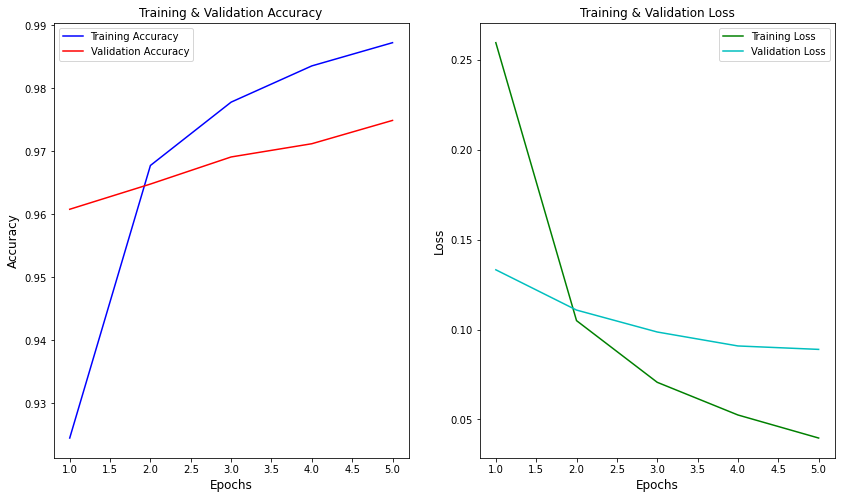

In [54]:
epochs = range(1, len(loss)+1)

fig, ax = plt.subplots(1, 2, figsize=(14,8))

# Plot the graphs:
ax[0].plot(epochs, acc, 'b-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'r-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=12)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend()

ax[1].plot(epochs, loss, 'g-', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'c-', label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss', fontsize=12)
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].legend()


In [55]:
# Load custom images and predict them:

img_num = 1
while os.path.isfile('digits/digits{}.png'.format(img_num)):
    try:
        img = cv2.imread('digits/digits{}.png'.format(img_num))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        img_num =+ 1
    except:
        print("Error reading Image! Proceeding with the next Image...........")
        img_num =+ 1